<a href="https://colab.research.google.com/github/abhigoogol/Visualize-CNN/blob/master/Visualizing_CNN_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Pytorch and other libraries installation

from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print("GPU: ", torch.cuda.is_available())


# !pip install Pillow==4.0.0
# !pip install image

tcmalloc: large alloc 1073750016 bytes == 0x5ca2a000 @  0x7f3e03cf92a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
0.4.0
GPU:  True


In [0]:
import torch
import torch.optim  as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms
import torchvision.models as models
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
# plt.style.use('seaborn-white')
# plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

In [0]:
def imshow(img, size=None):
    img = img / 2 + 0.5     # unnormalize
    if size == 'small':
        plt.figure(figsize=(2, 2))
    elif size == 'med' or 'None':
        plt.figure(figsize=(10, 10))
    elif size == 'large':
        plt.figure(figsize=(25, 50))
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# VGG

In [4]:
transform = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])

train_dataset = datasets.CIFAR10(root='.', download=True, train=True, transform=transform)
test_dataset = datasets.CIFAR10(root='.', download=True, train=False, transform=transform)

bs = 16

trainloader = DataLoader(dataset=train_dataset, batch_size=bs, shuffle=True)
testloader = DataLoader(dataset=test_dataset, batch_size=bs)

Files already downloaded and verified


In [5]:
vgg = models.vgg11(pretrained=True)
vgg

Downloading: "https://download.pytorch.org/models/vgg11-bbd30ac9.pth" to /root/.torch/models/vgg11-bbd30ac9.pth
100%|██████████| 531456000/531456000 [00:18<00:00, 29443677.63it/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (16): Conv2d(512, 512, kern

In [0]:
for i in vgg.parameters():
  print(i.shape)

torch.Size([64, 3, 3, 3])
torch.Size([64])
torch.Size([128, 64, 3, 3])
torch.Size([128])
torch.Size([256, 128, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([512, 256, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([4096, 25088])
torch.Size([4096])
torch.Size([4096, 4096])
torch.Size([4096])
torch.Size([1000, 4096])
torch.Size([1000])


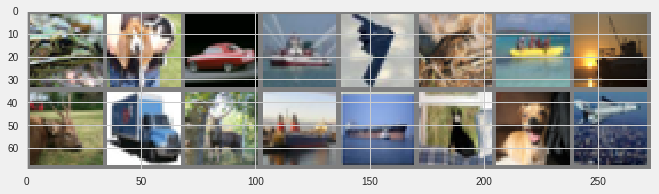

In [0]:
# Visualize dataset
images, labels = next(iter(trainloader))
imshow(torchvision.utils.make_grid(images))

In [0]:
print(images.shape)

torch.Size([16, 3, 32, 32])


Layer: 0 ; Layer shape: torch.Size([16, 64, 32, 32])


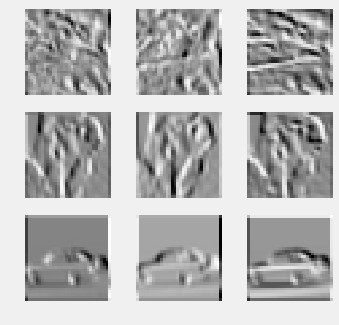

Layer: 1 ; Layer shape: torch.Size([16, 64, 32, 32])


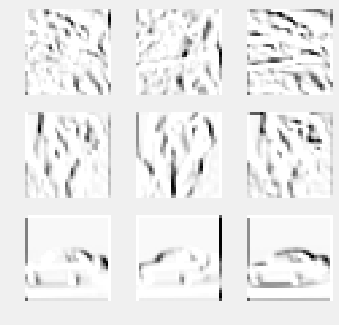

Layer: 2 ; Layer shape: torch.Size([16, 64, 16, 16])


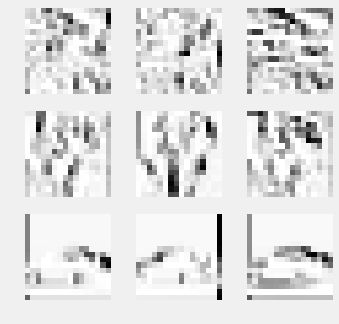

Layer: 3 ; Layer shape: torch.Size([16, 128, 16, 16])


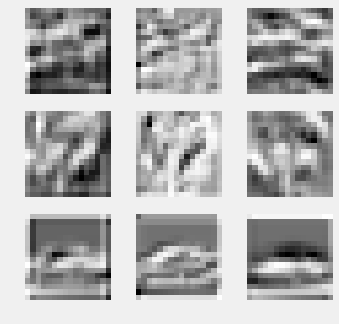

Layer: 4 ; Layer shape: torch.Size([16, 128, 16, 16])


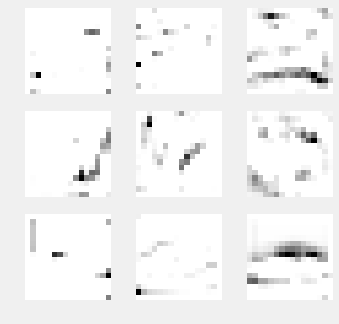

Layer: 5 ; Layer shape: torch.Size([16, 128, 8, 8])


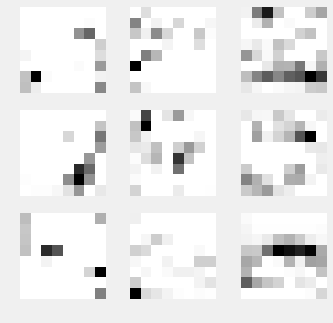

Layer: 6 ; Layer shape: torch.Size([16, 256, 8, 8])


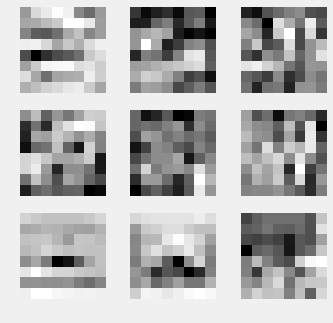

Layer: 7 ; Layer shape: torch.Size([16, 256, 8, 8])


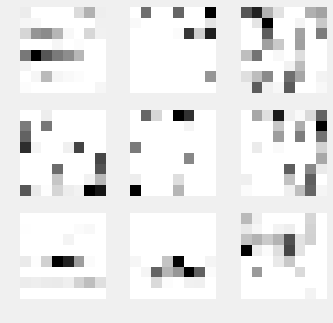

Layer: 8 ; Layer shape: torch.Size([16, 256, 8, 8])


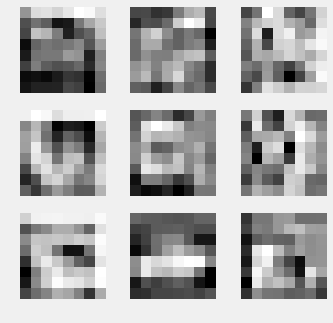

Layer: 9 ; Layer shape: torch.Size([16, 256, 8, 8])


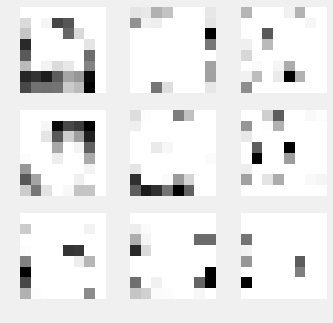

Layer: 10 ; Layer shape: torch.Size([16, 256, 4, 4])


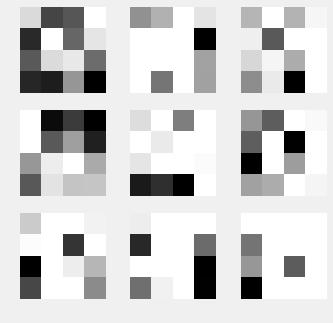

Layer: 11 ; Layer shape: torch.Size([16, 512, 4, 4])


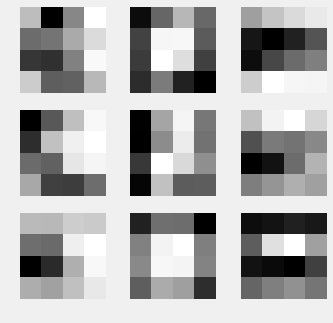

Layer: 12 ; Layer shape: torch.Size([16, 512, 4, 4])


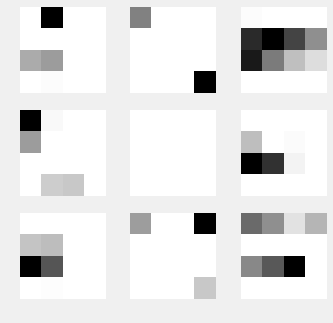

Layer: 13 ; Layer shape: torch.Size([16, 512, 4, 4])


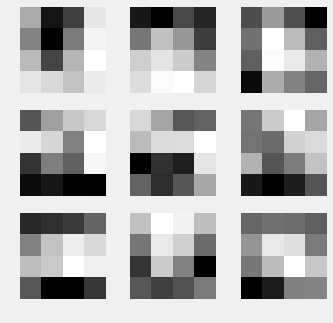

Layer: 14 ; Layer shape: torch.Size([16, 512, 4, 4])


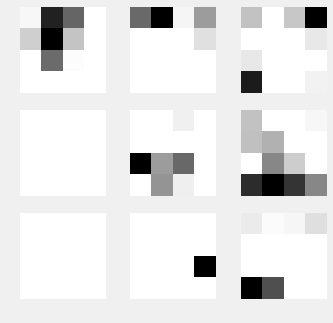

Layer: 15 ; Layer shape: torch.Size([16, 512, 2, 2])


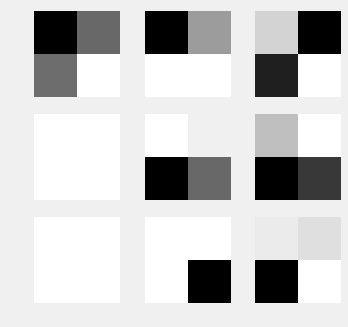

Layer: 16 ; Layer shape: torch.Size([16, 512, 2, 2])


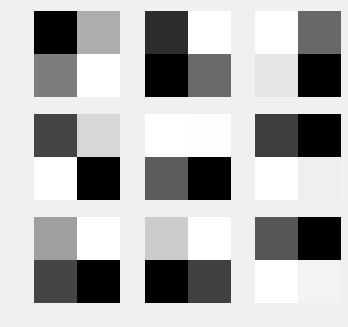

Layer: 17 ; Layer shape: torch.Size([16, 512, 2, 2])


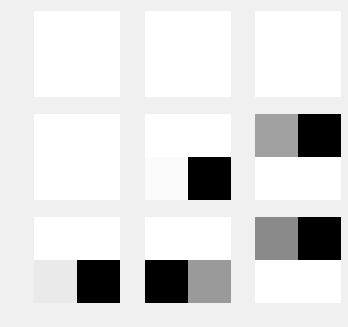

Layer: 18 ; Layer shape: torch.Size([16, 512, 2, 2])


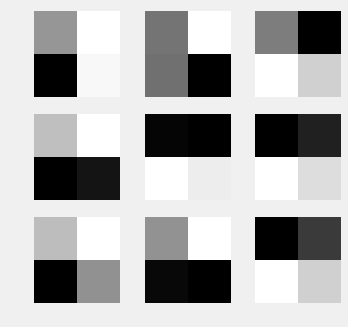

Layer: 19 ; Layer shape: torch.Size([16, 512, 2, 2])


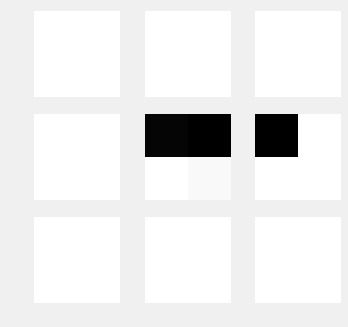

Layer: 20 ; Layer shape: torch.Size([16, 512, 1, 1])


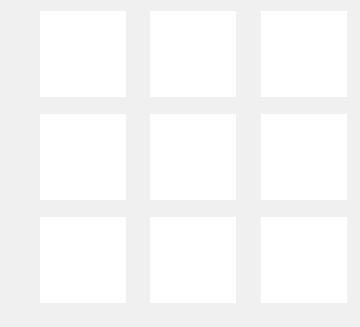

<Figure size 432x288 with 0 Axes>

In [0]:
# Plotting convolution layers
x = images
s = 3

for name, layer in vgg.features._modules.items():
  fig, at = plt.subplots(s, s, figsize=(5, 5), sharex=True, sharey=True)
  
  # Going forward through each layer
  x = layer(x)
  print('Layer:', name, '; Layer shape:', x.shape)

  for i in range(s):
    for j in range(s):
        at[i, j].axis('off')
        at[i][j].imshow(x[i][j][:,:].to('cpu').clone().detach())
  plt.show()
#   if name=='4':
#     break
plt.subplots_adjust(wspace=0.1, hspace=0.1)

In [0]:
for name, i in vgg.features.named_parameters():
  print(name, ':', i.shape)

0.weight : torch.Size([64, 3, 3, 3])
0.bias : torch.Size([64])
3.weight : torch.Size([128, 64, 3, 3])
3.bias : torch.Size([128])
6.weight : torch.Size([256, 128, 3, 3])
6.bias : torch.Size([256])
8.weight : torch.Size([256, 256, 3, 3])
8.bias : torch.Size([256])
11.weight : torch.Size([512, 256, 3, 3])
11.bias : torch.Size([512])
13.weight : torch.Size([512, 512, 3, 3])
13.bias : torch.Size([512])
16.weight : torch.Size([512, 512, 3, 3])
16.bias : torch.Size([512])
18.weight : torch.Size([512, 512, 3, 3])
18.bias : torch.Size([512])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer: 0.weight ; Layer shape: torch.Size([64, 3, 3, 3])


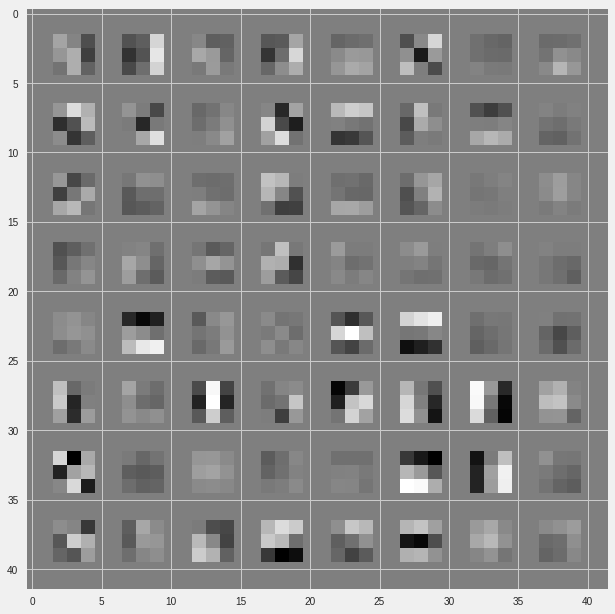

Layer: 3.weight ; Layer shape: torch.Size([128, 64, 3, 3])


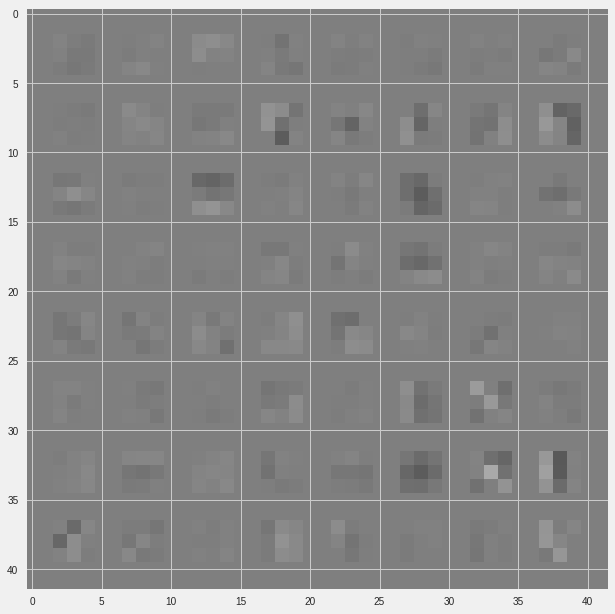

Layer: 6.weight ; Layer shape: torch.Size([256, 128, 3, 3])


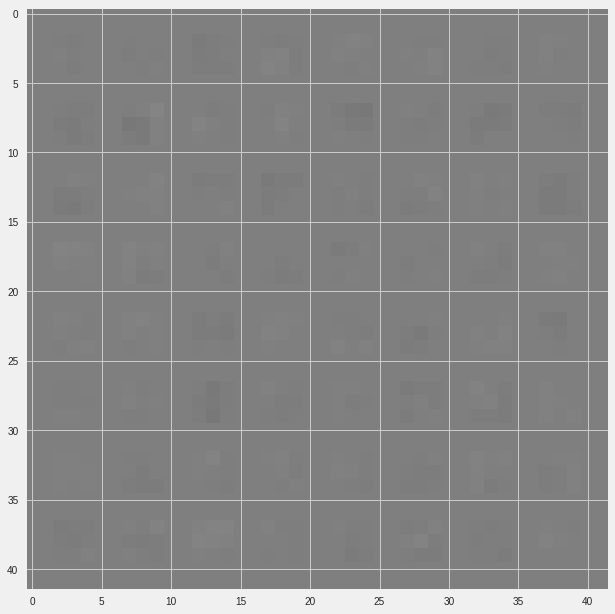

Layer: 8.weight ; Layer shape: torch.Size([256, 256, 3, 3])


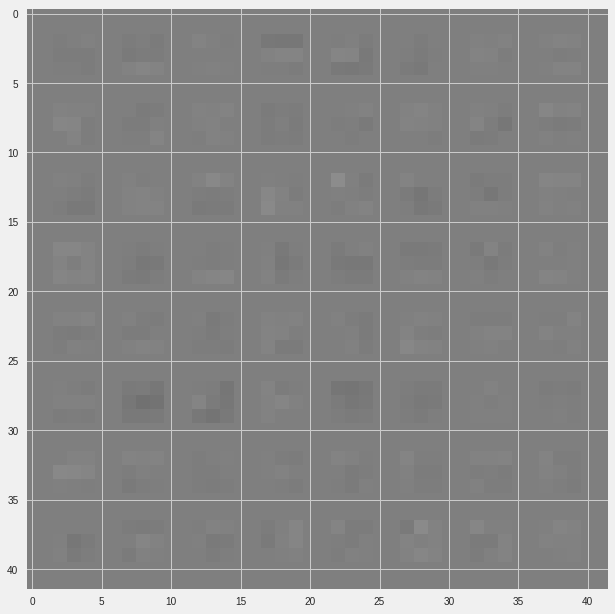

Layer: 11.weight ; Layer shape: torch.Size([512, 256, 3, 3])


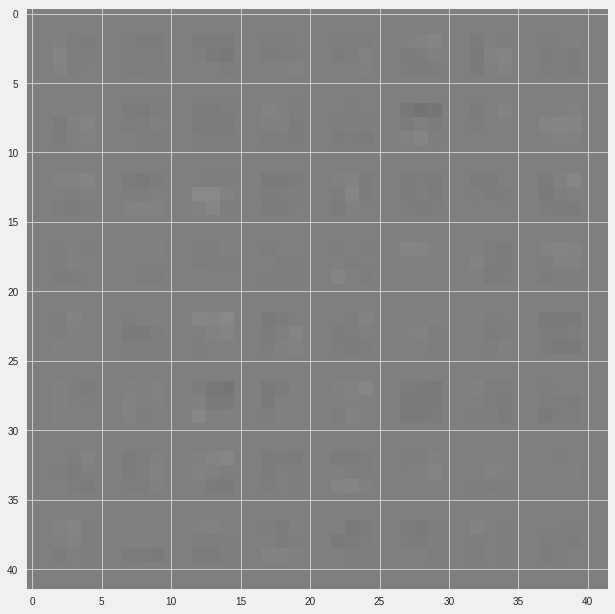

Layer: 13.weight ; Layer shape: torch.Size([512, 512, 3, 3])


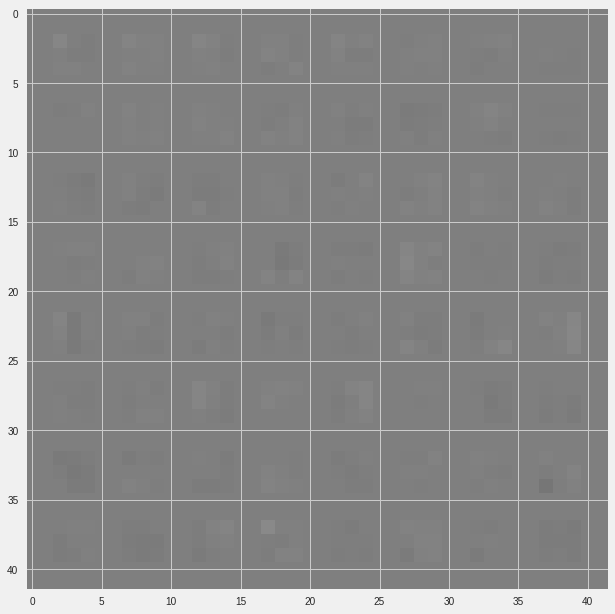

Layer: 16.weight ; Layer shape: torch.Size([512, 512, 3, 3])


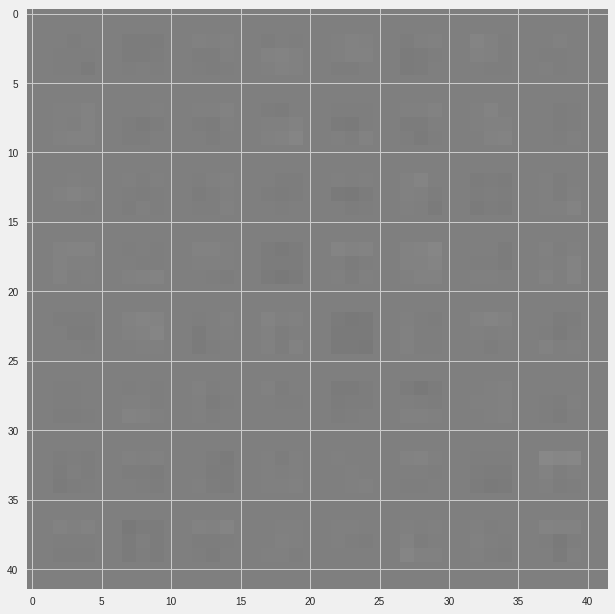

Layer: 18.weight ; Layer shape: torch.Size([512, 512, 3, 3])


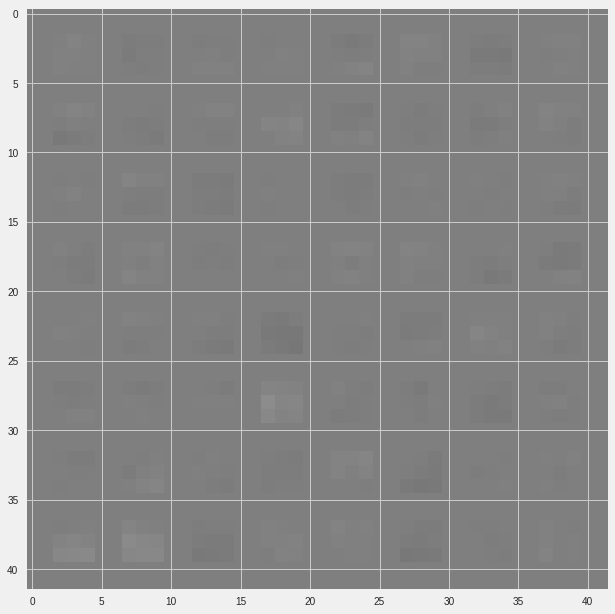

In [0]:
#Plotting each layer weights
for name, i in vgg.features.named_parameters():
  if len(i.shape) < 4:
    continue
  else:
    print('Layer:', name, '; Layer shape:', i.shape)
  b, c = i.shape[0], i.shape[1]
  # to ease the plotting, the some dimension values are restricted.
  imshow(torchvision.utils.make_grid(i[:min(b, 64),:min(c, 1),:,:].to('cpu').clone().detach()))
#   break

## Trying 1 Image

In [0]:
images, labels = next(iter(trainloader))

torch.Size([3, 32, 32])


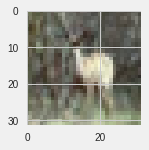

torch.Size([3, 32, 32])


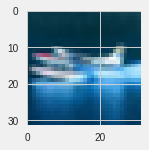

torch.Size([3, 32, 32])


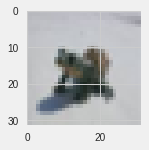

In [15]:
for i in range(3):
  image = images[i,:,:,:]
  print(image.shape)
  imshow(image, size='small')

torch.Size([3, 32, 32])


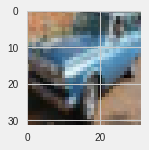

In [29]:
image = images[6,:,:,:]
print(image.shape)
imshow(image, size='small')

In [22]:
int(np.sqrt(x.shape[1]))

8

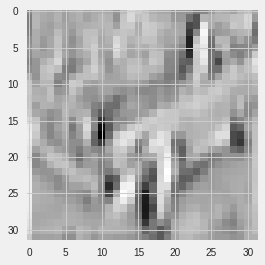

In [33]:
plt.imshow(x[0, 1][:,:].detach().numpy())

In [0]:
from google.colab import files
files.download('figure_1.png') 

In [0]:
# !ls images

for i in range(6):
  files.download('images/figure_'+str(i)+'.png')   

## Layer Activation

Layer: 0 ; Layer shape: torch.Size([1, 64, 32, 32])


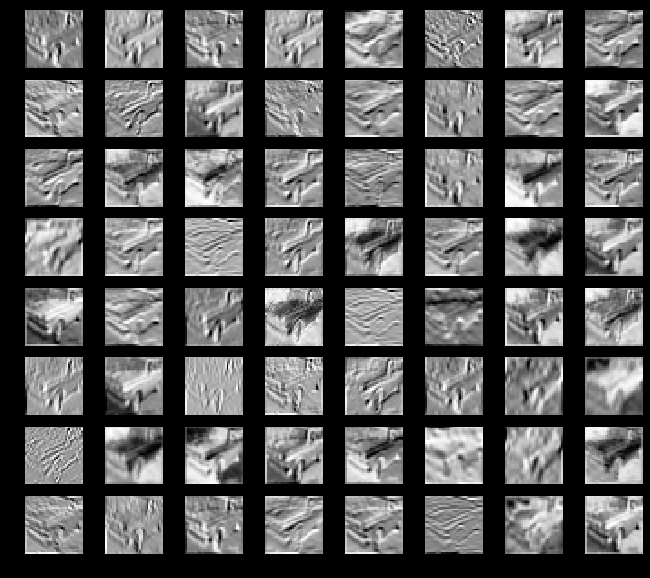

Layer: 1 ; Layer shape: torch.Size([1, 64, 32, 32])


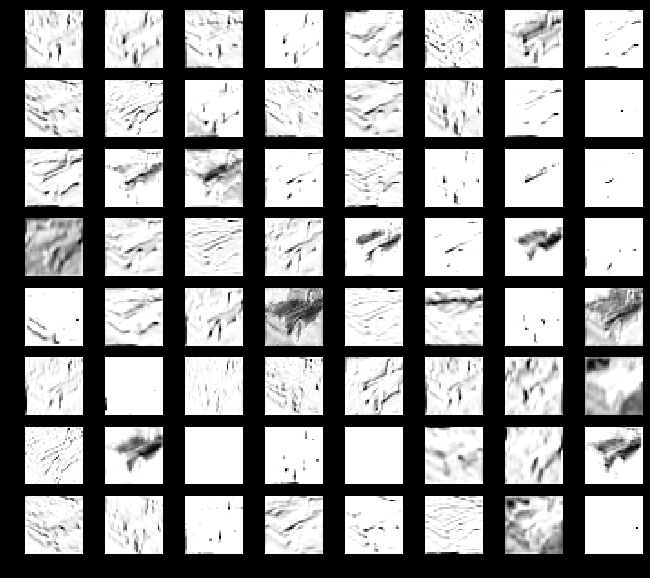

Layer: 2 ; Layer shape: torch.Size([1, 64, 16, 16])


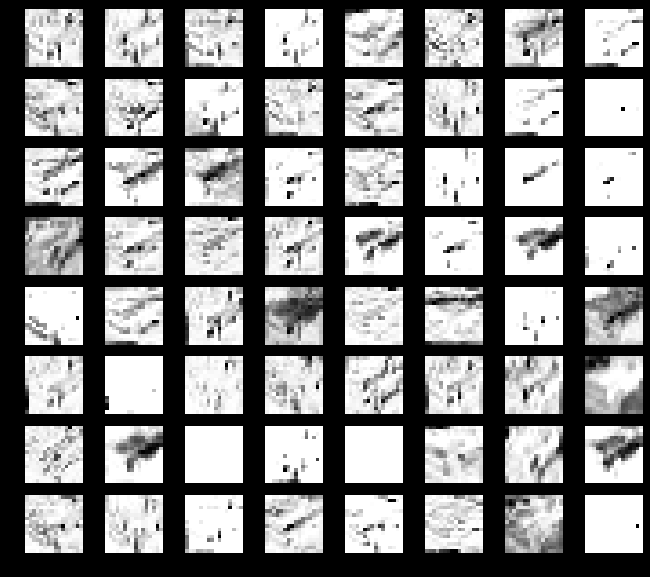

Layer: 3 ; Layer shape: torch.Size([1, 128, 16, 16])


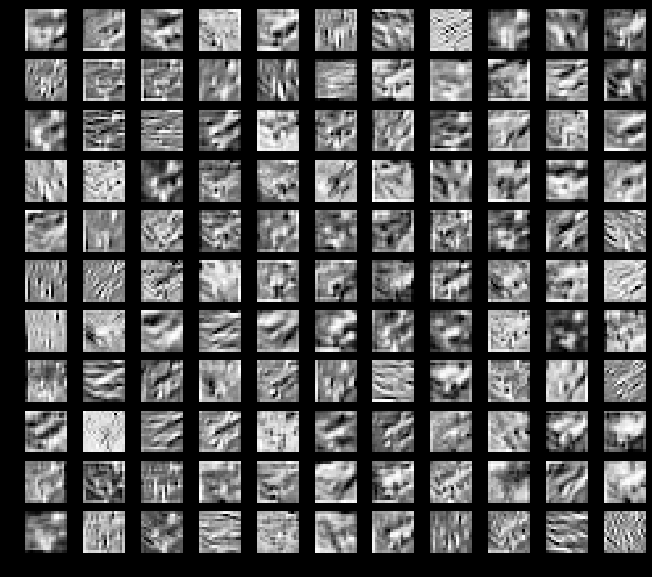

Layer: 4 ; Layer shape: torch.Size([1, 128, 16, 16])


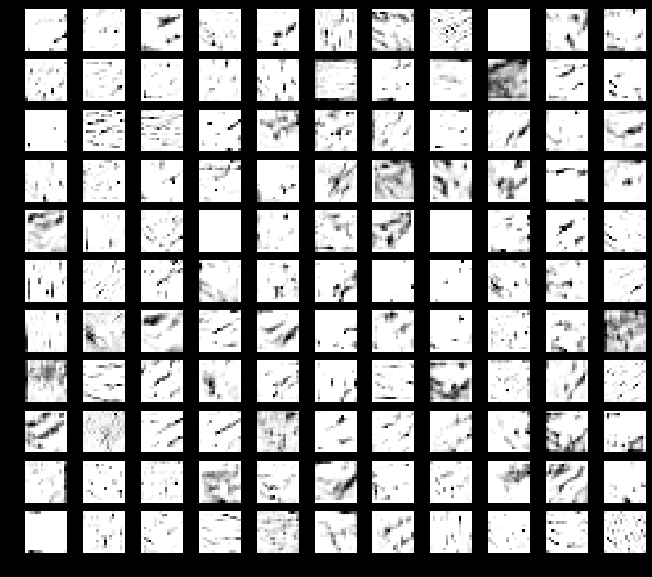

Layer: 5 ; Layer shape: torch.Size([1, 128, 8, 8])


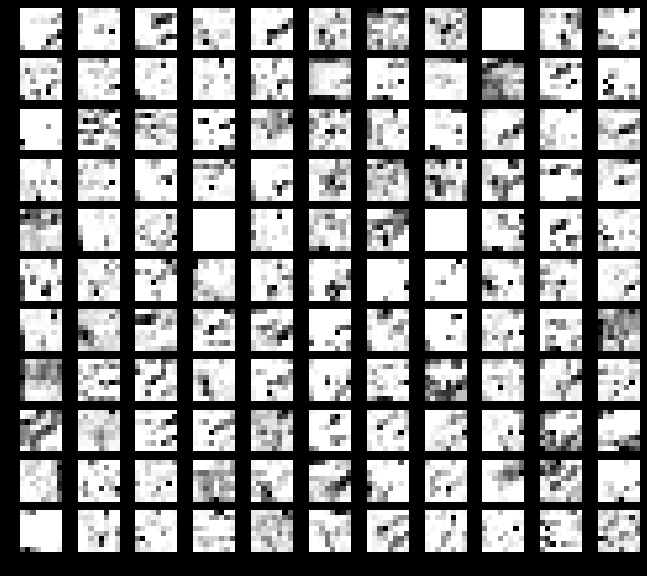

<Figure size 432x288 with 0 Axes>

In [55]:
# Plotting convolution layers
x = image.unsqueeze(0)

#you can change plot images size to see weights in more detail
plot_image_size = 10

for name, layer in vgg.features._modules.items():
  # Going forward through each layer
  x = layer(x)
  print('Layer:', name, '; Layer shape:', x.shape)
  
  s = int(np.sqrt(x.shape[1]))
  fig, at = plt.subplots(s, s, figsize=(plot_image_size, plot_image_size), sharex=True, sharey=True)

  temp = 0
  for i in range(s):
    for j in range(s):
        at[i, j].axis('off')
        at[i][j].imshow(x[0, temp][:,:].to('cpu').clone().detach())
        temp+=1
  fig.savefig('images/figure_'+name+'.png')
  plt.show()
  
  # To stop plotting
  if name=='5':
    break
plt.subplots_adjust(wspace=0.1, hspace=0.1)

## Layer Weights

In [0]:
#Plotting each layer weights
for name, i in vgg.features.named_parameters():
  if len(i.shape) < 4:
    continue
  else:
    print('Layer:', name, '; Layer shape:', i.shape)
  b, c = i.shape[0], i.shape[1]
  # to ease the plotting, the some dimension values are restricted.
  imshow(torchvision.utils.make_grid(i[:min(b, 64),:min(c, 1),:,:].to('cpu').clone().detach()))
#   break

In [60]:
for name, w in vgg.features.named_parameters():
  print(name, w.shapejj)

0.weight torch.Size([64, 3, 3, 3])
0.bias torch.Size([64])
3.weight torch.Size([128, 64, 3, 3])
3.bias torch.Size([128])
6.weight torch.Size([256, 128, 3, 3])
6.bias torch.Size([256])
8.weight torch.Size([256, 256, 3, 3])
8.bias torch.Size([256])
11.weight torch.Size([512, 256, 3, 3])
11.bias torch.Size([512])
13.weight torch.Size([512, 512, 3, 3])
13.bias torch.Size([512])
16.weight torch.Size([512, 512, 3, 3])
16.bias torch.Size([512])
18.weight torch.Size([512, 512, 3, 3])
18.bias torch.Size([512])


# Custom Model

In [0]:
# Data Transforms - Augumentation and preprocessing
# Downloading MNIST Dataset
bs = 32
transform = torchvision.transforms.ToTensor()
traindataset = torchvision.datasets.MNIST('.', download=True, train=True, transform=transform)
valdataset = torchvision.datasets.MNIST('.', train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(dataset=traindataset, shuffle=True, batch_size=bs)
valloader = torch.utils.data.DataLoader(dataset=valdataset, batch_size=bs)

Processing...
Done!


torch.Size([32, 1, 28, 28])
torch.Size([1, 28, 28])


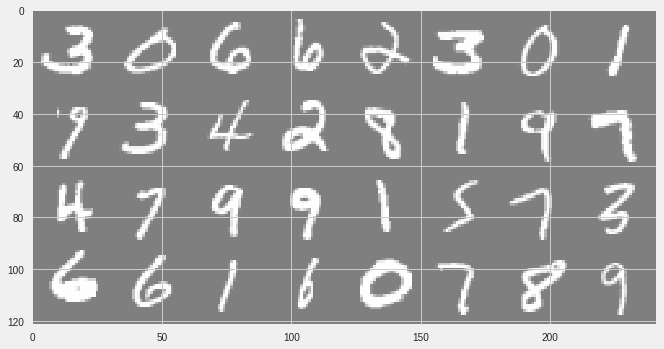

In [0]:
# Visualize dataset
images, labels = next(iter(trainloader))
# print(images.shape, labels.shape)
# print(labels)
print(images.shape)
print(images[0].shape)
imshow(torchvision.utils.make_grid(images))

In [0]:
# Create CNN network
class MNISTCNN(nn.Module):
    def __init__(self, in_channels, out):
        super(MNISTCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 256, 7)
        self.fc1 = nn.Linear(22*22*256, 10)
        # self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = x.view(x.size(0), -1)
        out = self.fc1(x)
        return out
    
    def activation(self, x):
        z1 = self.conv1(x)
        a1 = F.relu(z1)
        return a1, z1

In [0]:
model = MNISTCNN(1, 10)

torch.Size([1, 28, 28])


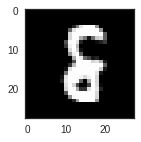

torch.Size([1, 1, 28, 28])


In [0]:
print(images[0].shape)
imshow(torchvision.utils.make_grid(images[0].unsqueeze(0)), size='small')
print(images[0].unsqueeze(0).shape)

In [0]:
print(images.shape)

torch.Size([32, 1, 28, 28])


In [0]:
a1, z1 = model.activation(images)
# a1, z1 = model.activation(images[0].unsqueeze(0))
print(a1.shape)
print(z1.shape)

torch.Size([32, 256, 22, 22])
torch.Size([32, 256, 22, 22])


In [0]:
print(a1[:,0:24,:,:].shape)

torch.Size([1, 24, 24, 24])


In [0]:
for j in range(5):
    print(a1[0][j][:,:].shape)

torch.Size([24, 24])
torch.Size([24, 24])
torch.Size([24, 24])
torch.Size([24, 24])
torch.Size([24, 24])


## Conv Layer

In [0]:
# First batch, third channel values of first activation layer
print(a1[0][3][:,:])

tensor([[ 0.0850,  0.0850,  0.0850,  0.0850,  0.0850,  0.0850,  0.0850,
          0.0850,  0.0850,  0.0850,  0.0850,  0.0850,  0.0850,  0.0850,
          0.0850,  0.0850,  0.0850,  0.0850,  0.0850,  0.0850,  0.0850,
          0.0850,  0.0850,  0.0850],
        [ 0.0850,  0.0850,  0.0850,  0.0850,  0.0850,  0.0850,  0.0850,
          0.0850,  0.0850,  0.0850,  0.0850,  0.0850,  0.0850,  0.0850,
          0.0850,  0.0850,  0.0850,  0.0850,  0.0850,  0.0850,  0.0850,
          0.0850,  0.0850,  0.0850],
        [ 0.0850,  0.0850,  0.0850,  0.0850,  0.0850,  0.0850,  0.0850,
          0.0850,  0.0850,  0.0850,  0.0850,  0.0850,  0.0850,  0.0850,
          0.0850,  0.0850,  0.0850,  0.0850,  0.0850,  0.0850,  0.0850,
          0.0850,  0.0850,  0.0850],
        [ 0.0850,  0.0850,  0.0850,  0.0850,  0.0850,  0.0850,  0.0850,
          0.0850,  0.0850,  0.0850,  0.0850,  0.0799,  0.0751,  0.1336,
          0.2284,  0.3247,  0.3306,  0.3232,  0.2876,  0.1392,  0.0311,
          0.0000,  0.0779

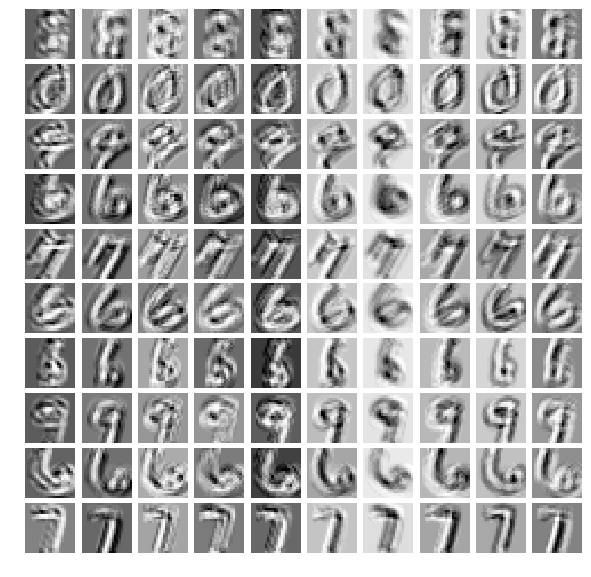

In [0]:
s = 10
fig, at = plt.subplots(s, s, figsize=(s, s), sharex=True, sharey=True)
for i in range(s):
    for j in range(s):
        at[i, j].axis('off')
        at[i][j].imshow(z1[i][j][:,:].to('cpu').clone().detach())
#     break
plt.subplots_adjust(wspace=0.1, hspace=0.1)

## Activation

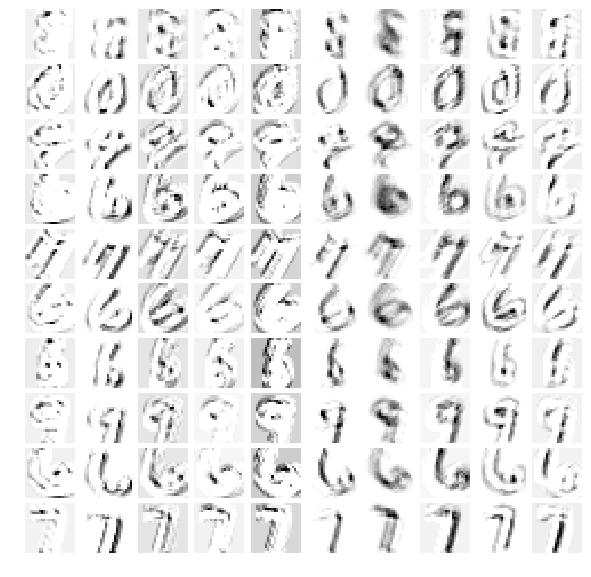

In [0]:
s = 10
fig, at = plt.subplots(s, s, figsize=(s, s), sharex=True, sharey=True)
for i in range(s):
    for j in range(s):
        at[i, j].axis('off')
        at[i][j].imshow(a1[i][j][:,:].to('cpu').clone().detach())
#     break
plt.subplots_adjust(wspace=0.1, hspace=0.1)

conv1 Conv2d(1, 256, kernel_size=(3, 3), stride=(1, 1))
torch.Size([32, 256, 26, 26])
torch.Size([26, 26])


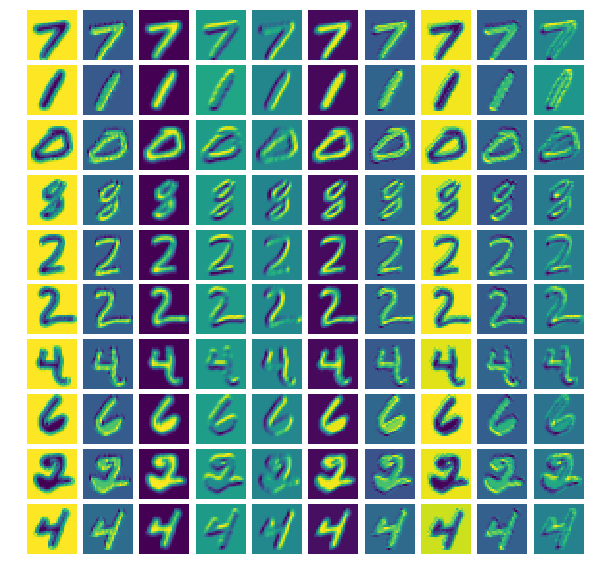

In [0]:
x = images
s = 10
fig, at = plt.subplots(s, s, figsize=(s, s), sharex=True, sharey=True)
# plt.subplots(constrained_layout=True)
for name, layer in model._modules.items():
    if name=='fc1':
        break
    print(name, layer)
    x = layer(x)
    print(x.shape)
    print(x[0][0][:][:].shape)
    for i in range(s):
        for j in range(s):
            at[i, j].axis('off')
            at[i][j].imshow(x[i,j,:,:].to('cpu').clone().detach())
#     break
plt.subplots_adjust(wspace=0.1, hspace=0.1)


## Model Weights

### Weights Before Training

In [0]:
for i in model.parameters():
  print(i.shape)

torch.Size([256, 1, 5, 5])
torch.Size([256])
torch.Size([10, 147456])
torch.Size([10])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


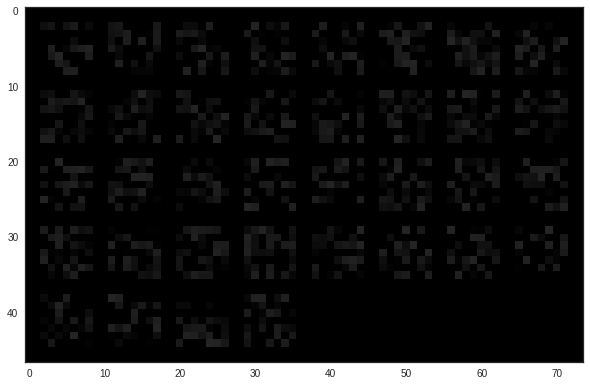

IndexError: ignored

In [0]:
for i in model.named_parameters():
    if 'fc' not in i[0]:
# #       print(i[[1, 0:2,:,:,:].shape)
# #       print(i[1][0].shape)
# #       imshow(torchvision.utils.make_grid(i[1][0:24,0,:,:].to('cpu').clone().detach()))
        imshow(torchvision.utils.make_grid(i[1][0:36,:,:,:].to('cpu').clone().detach()))
# #       break

### Custom Model

In [0]:
model = MNISTCNN(1, 10)
if torch.cuda.is_available():
    model.cuda()
optimizer = optim.SGD(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

epochs = 20
for i in range(1, epochs+1):
    for images, labels in trainloader:
        model.train()
        if torch.cuda.is_available():
            images, labels = Variable(images).cuda(), Variable(labels.cuda())
            output = model(images)
            loss = criterion(output, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    else:
        pass
        # model.eval()
        # with torch.no_grad():
        #     for images, labels in valloader:
        #         if torch.cuda.is_available():
        #             images, labels = Variable(images).cuda(), Variable(labels.cuda())
        #             output = model(images)
        #             loss = criterion(output, labels)
    print(loss.item())

0.5995531678199768
0.2819589674472809
0.4342494606971741
0.2210937738418579
0.20109668374061584
0.08257026970386505
0.1944662630558014
0.08877776563167572
0.11112795025110245
0.021412789821624756
0.09587980806827545
0.07692904025316238
0.17795154452323914
0.05500321835279465
0.060695260763168335
0.05260752886533737
0.04933074116706848
0.05973002314567566
0.05257965624332428
0.05496978759765625


### Weights after training

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


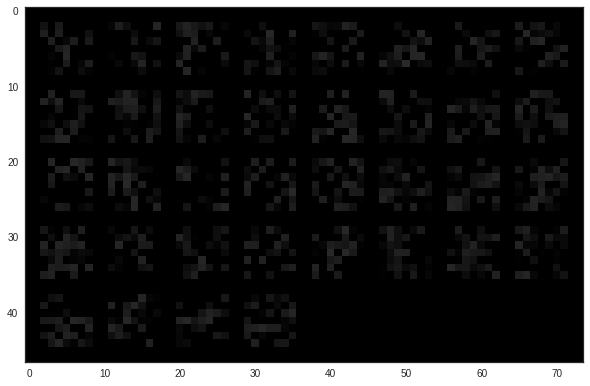

IndexError: ignored

In [0]:
for i in model.named_parameters():
    if 'fc' not in i[0]:
#         print(i[1][0:25,:,:,:].shape)
        imshow(torchvision.utils.make_grid(i[1][0:36,:,:,:].to('cpu').clone().detach()))
#         break